In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir /content/drive/MyDrive/Plant

In [ ]:
import os
path_dir = '/content/drive/MyDrive/Plant'
os.chdir(path_dir)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrixa
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.json

!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Plant/plant-disease-recognition-dataset.zip', 'r') as zipObj: zipObj.extractall()

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
 99% 1.24G/1.25G [00:15<00:00, 97.7MB/s]
100% 1.25G/1.25G [00:15<00:00, 86.6MB/s]


In [ ]:
# Cargar los datos
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'Train/Train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        'Validation/Validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'Test/Test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model()

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping])

Epoch 1/10
42/42 [==============================] - 504s 12s/step - loss: 1.2437 - accuracy: 0.5280 - val_loss: 0.7160 - val_accuracy: 0.6167
Epoch 2/10
42/42 [==============================] - 163s 4s/step - loss: 0.6214 - accuracy: 0.7458 - val_loss: 0.7324 - val_accuracy: 0.6167
Epoch 3/10
42/42 [==============================] - 156s 4s/step - loss: 0.3362 - accuracy: 0.8638 - val_loss: 0.4083 - val_accuracy: 0.8833
Epoch 4/10
42/42 [==============================] - 164s 4s/step - loss: 0.2296 - accuracy: 0.9206 - val_loss: 0.5635 - val_accuracy: 0.8167
Epoch 5/10
42/42 [==============================] - 158s 4s/step - loss: 0.1654 - accuracy: 0.9372 - val_loss: 0.4601 - val_accuracy: 0.8333
Epoch 6/10
42/42 [==============================] - 164s 4s/step - loss: 0.1062 - accuracy: 0.9652 - val_loss: 0.4840 - val_accuracy: 0.8667
Epoch 7/10
42/42 [==============================] - 155s 4s/step - loss: 0.0734 - accuracy: 0.9766 - val_loss: 0.2694 - val_accuracy: 0.9000
Epoch 8/10
4

5/5 [==============================] - 60s 14s/step - loss: 0.4276 - accuracy: 0.9067
Test accuracy: 0.9066666960716248
Test loss: 0.427636057138443
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 72, 72, 64)        0         
                                       

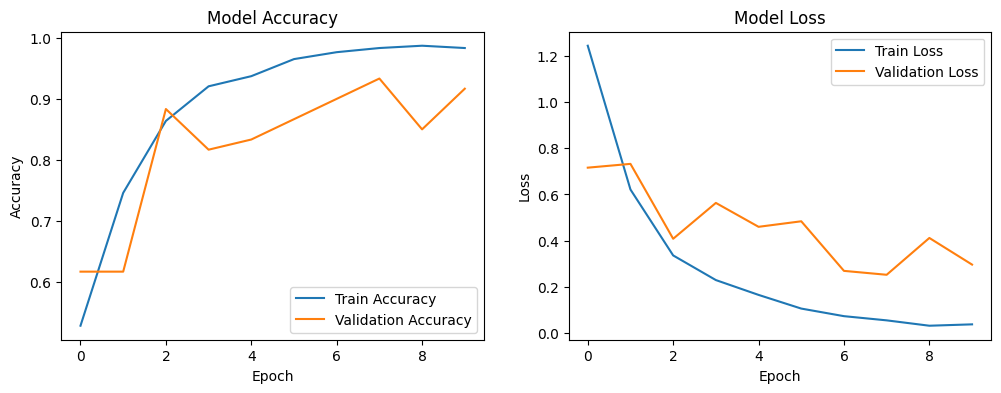

In [ ]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')
print(f'Test loss: {loss}')

# Mostrar el resumen del modelo
model.summary()

# Plotear la precisión y la pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

5/5 [==============================] - 12s 2s/step


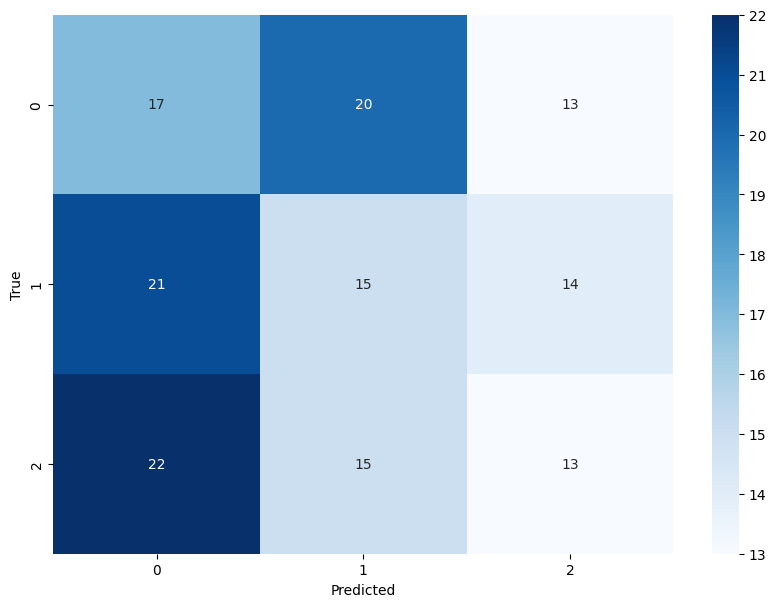

In [ ]:
# Generar predicciones
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Generar y mostrar la matriz de confusión
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')

    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    predicted_class = np.argmax(prediction, axis=1)

    label_map = train_generator.class_indices
    inverse_label_map = dict((v,k) for k,v in label_map.items())

    plt.title("Predicted class: " + inverse_label_map[predicted_class[0]])
    plt.show()

    return predicted_class

# Ejemplo de uso
img_path = "Test/Test/Powdery/85e269f2ca36761c.jpg"
predict_image(img_path, model)

In [ ]:
# Guardar el modelo completo
model.save('model.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir model_js

mkdir: cannot create directory ‘model_js’: File exists


In [ ]:
!tensorflowjs_converter --input_format keras model.h5 model_js

2024-07-25 12:49:43.330468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 12:49:43.402740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 12:49:43.402816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-25 12:49:46.382758: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
path_dir = '/content/'
os.chdir(path_dir)